# Description

TODO

- rename this file to be 27-

# Modules

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Settings

In [2]:
INPUT_DIR = conf.RESULTS["GLS"]
display(INPUT_DIR)

PosixPath('/opt/data/results/gls')

In [3]:
INPUT_FILENAME = INPUT_DIR / "gls-null_simulations.pkl"
display(INPUT_FILENAME)
assert INPUT_FILENAME.exists()

PosixPath('/opt/data/results/gls/gls-null_simulations.pkl')

In [4]:
INPUT_REAL_FILENAME = INPUT_DIR / "gls-null_simulations-real_data.pkl"
display(INPUT_REAL_FILENAME)
assert INPUT_REAL_FILENAME.exists()

PosixPath('/opt/data/results/gls/gls-null_simulations-real_data.pkl')

# Null simulations - artificial gene-trait associations

## Load data

In [5]:
results = pd.read_pickle(INPUT_FILENAME)

In [6]:
results.shape

(10, 4)

In [7]:
results.head()

,phenotype,lv,coef,pvalue
0,random_normal-73,LV793,-0.015397,0.892538
1,random_normal-74,LV738,0.018206,0.071598
2,random_normal-71,LV507,0.006586,0.294598
3,random_normal-21,LV326,-0.002914,0.590851
4,random_normal-51,LV682,0.003964,0.377072


## Plot

In [8]:
data = results["pvalue"].to_numpy()
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [9]:
display(data[:5])
display(uniform_data[:5])

array([0.89253774, 0.0715977 , 0.29459795, 0.59085101, 0.37707179])

array([0.04141019, 0.13597992, 0.23054965, 0.32511938, 0.4196891 ])

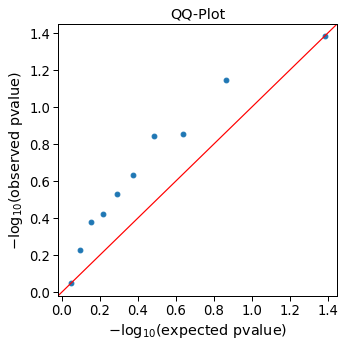

In [10]:
with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(5, 5))

    fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot")

# Null simulations - real gene-trait associations

## Load data

In [11]:
results = pd.read_pickle(INPUT_REAL_FILENAME)

In [12]:
results.shape

(10, 4)

In [13]:
results.head()

,phenotype,lv,coef,pvalue
0,supraventricular tachycardia,LV836,0.024826,0.023398
1,soft tissue neoplasm,LV965,-0.008985,0.768745
2,22601_62133370-Job_coding_traveltour_guide,LV725,0.000105,0.496584
3,radius fracture,LV670,-0.014912,0.880191
4,radius fracture,LV922,0.024495,0.023172


## Plot

In [14]:
data = results["pvalue"].to_numpy()
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [15]:
display(data[:5])
display(uniform_data[:5])

array([0.02339773, 0.76874472, 0.49658352, 0.88019134, 0.02317226])

array([0.02317226, 0.12566372, 0.22815517, 0.33064663, 0.43313808])

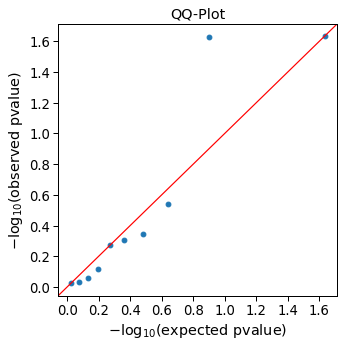

In [16]:
with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(5, 5))

    fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot")